In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os

In [2]:
# load the data
df = pd.read_csv('Data/mostStarredRepos.csv')
df.head()

,id,name,owner_user,owner_type,description,url,is_fork,date_created,date_updated,date_pushed,...,has _discussions,num_forks,is_archived,is_disabled,is_template,license,allows_forking,open_issues_count,open_issues,topics
0,54346799,public-apis,public-apis,Organization,A collective list of free APIs,https://api.github.com/repos/public-apis/publi...,False,2016-03-20T23:49:42Z,2024-02-09T20:07:51Z,2024-02-07T04:55:57Z,...,False,31309,False,False,False,MIT License,True,237,237,"['api', 'apis', 'dataset', 'development', 'fre..."
1,83222441,system-design-primer,donnemartin,User,Learn how to design large-scale systems. Prep ...,https://api.github.com/repos/donnemartin/syste...,False,2017-02-26T16:15:28Z,2024-02-09T20:04:25Z,2024-01-16T22:15:13Z,...,False,42633,False,False,False,Other,True,415,415,"['design', 'design-patterns', 'design-system',..."
2,21289110,awesome-python,vinta,User,"A curated list of awesome Python frameworks, l...",https://api.github.com/repos/vinta/awesome-python,False,2014-06-27T21:00:06Z,2024-02-09T20:18:54Z,2024-02-05T12:23:07Z,...,False,24648,False,False,False,Other,True,419,419,"['awesome', 'collections', 'python', 'python-f..."
3,63476337,Python,TheAlgorithms,Organization,All Algorithms implemented in Python,https://api.github.com/repos/TheAlgorithms/Python,False,2016-07-16T09:44:01Z,2024-02-09T20:06:24Z,2024-02-05T19:48:15Z,...,True,43858,False,False,False,MIT License,True,224,224,"['algorithm', 'algorithm-competitions', 'algor..."
4,123458551,Python-100-Days,jackfrued,User,Python - 100天从新手到大师,https://api.github.com/repos/jackfrued/Python-...,False,2018-03-01T16:05:52Z,2024-02-09T18:54:08Z,2024-01-28T22:33:10Z,...,False,51102,False,False,False,No license,True,706,706,[]


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1200 entries, 0 to 1199
Data columns (total 30 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   id                 1200 non-null   int64 
 1   name               1200 non-null   object
 2   owner_user         1200 non-null   object
 3   owner_type         1200 non-null   object
 4   description        1200 non-null   object
 5   url                1200 non-null   object
 6   is_fork            1200 non-null   bool  
 7   date_created       1200 non-null   object
 8   date_updated       1200 non-null   object
 9   date_pushed        1200 non-null   object
 10  size               1200 non-null   int64 
 11  stars              1200 non-null   int64 
 12  watchers           1200 non-null   int64 
 13  updated_at         1200 non-null   object
 14  language           1200 non-null   object
 15  has_issues         1200 non-null   bool  
 16  has_projects       1200 non-null   bool  


In [4]:
# Drop the columns that are not needed
df = df.drop(['is_archived', 'is_disabled', 'has_pages', 'owner_type', 'has_projects', 'is_template', 'has _discussions', 'date_created', 'allows_forking', 'size', 'is_fork', 'date_pushed', 'watchers', 'updated_at', 'has_wiki', 'open_issues_count'], axis=1)
df.info()
df.shape

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1200 entries, 0 to 1199
Data columns (total 14 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   id             1200 non-null   int64 
 1   name           1200 non-null   object
 2   owner_user     1200 non-null   object
 3   description    1200 non-null   object
 4   url            1200 non-null   object
 5   date_updated   1200 non-null   object
 6   stars          1200 non-null   int64 
 7   language       1200 non-null   object
 8   has_issues     1200 non-null   bool  
 9   has_downloads  1200 non-null   bool  
 10  num_forks      1200 non-null   int64 
 11  license        1200 non-null   object
 12  open_issues    1200 non-null   int64 
 13  topics         1200 non-null   object
dtypes: bool(2), int64(4), object(8)
memory usage: 115.0+ KB


(1200, 14)

/var/folders/cv/7plhz1gs47ggc8534599rnhc0000gn/T/ipykernel_31674/1448350582.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = df.corr()


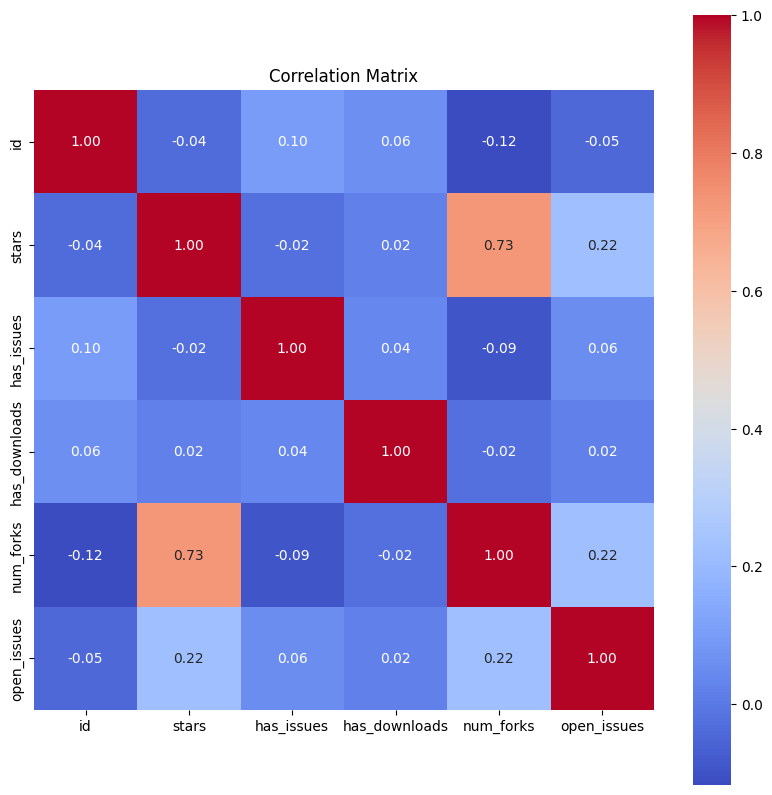

In [6]:
# make a orrelation matrix with matplot to see if there are any correlations between the variables
corr = df.corr()
plt.figure(figsize=(10,10))
sns.heatmap(corr, annot=True, cmap='coolwarm', cbar=True, square=True, fmt='.2f')
plt.title('Correlation Matrix')
plt.show()